In [15]:
from unittest import skipUnless
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('customer_churn.csv')
df.drop('CustomerID',axis=1,inplace=True)
df

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Male,58,3,73819.57,1,0,0,42115.00,0
1,Female,47,4,198351.81,1,0,0,136770.95,0
2,Male,34,5,46307.11,4,1,0,120984.43,1
3,Male,66,4,229438.12,2,1,1,29942.39,0
4,Male,37,6,106131.86,3,0,0,148274.78,1
...,...,...,...,...,...,...,...,...,...
795,Male,49,8,200088.72,3,1,0,36522.51,0
796,Male,63,6,165666.13,4,1,0,44606.87,0
797,Male,60,9,23071.20,4,0,1,79713.09,0
798,Male,33,6,149080.38,2,1,1,117776.73,0


In [17]:
label = LabelEncoder()
for i in df.select_dtypes(include=['object']).columns:
    df[i] = label.fit_transform(df[i])
df

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,58,3,73819.57,1,0,0,42115.00,0
1,0,47,4,198351.81,1,0,0,136770.95,0
2,1,34,5,46307.11,4,1,0,120984.43,1
3,1,66,4,229438.12,2,1,1,29942.39,0
4,1,37,6,106131.86,3,0,0,148274.78,1
...,...,...,...,...,...,...,...,...,...
795,1,49,8,200088.72,3,1,0,36522.51,0
796,1,63,6,165666.13,4,1,0,44606.87,0
797,1,60,9,23071.20,4,0,1,79713.09,0
798,1,33,6,149080.38,2,1,1,117776.73,0


In [18]:
X = df[['Balance','EstimatedSalary']].values
y = df['Exited'].values

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.66904365, -1.11330667],
       [ 1.05619499,  1.40516757],
       [-1.05019442,  0.98514174],
       ...,
       [-1.37209893, -0.11294883],
       [ 0.37360087,  0.89979571],
       [ 0.21172713,  1.4304199 ]], shape=(800, 2))

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.3,random_state=31)

kernel : linear|| Accuracy: 67.92%


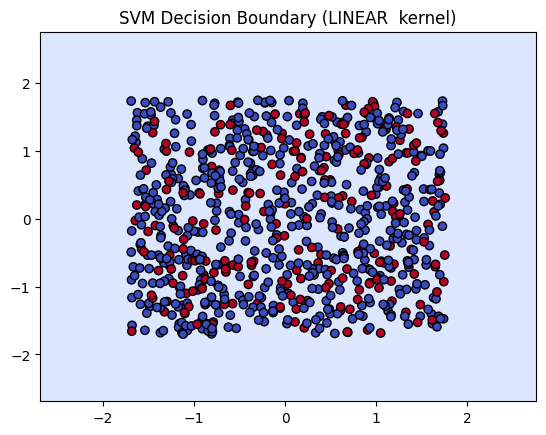

kernel : poly|| Accuracy: 67.92%


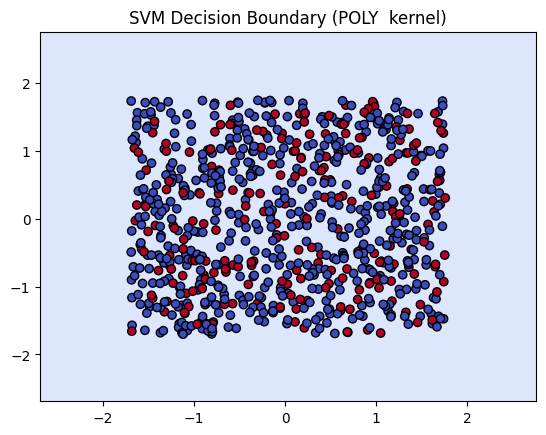

kernel : rbf|| Accuracy: 67.92%


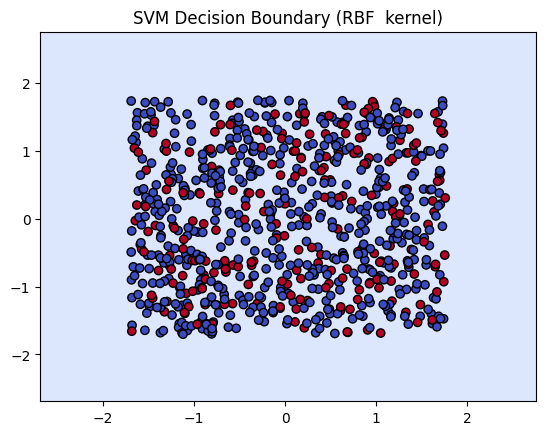

kernel : sigmoid|| Accuracy: 55.42%


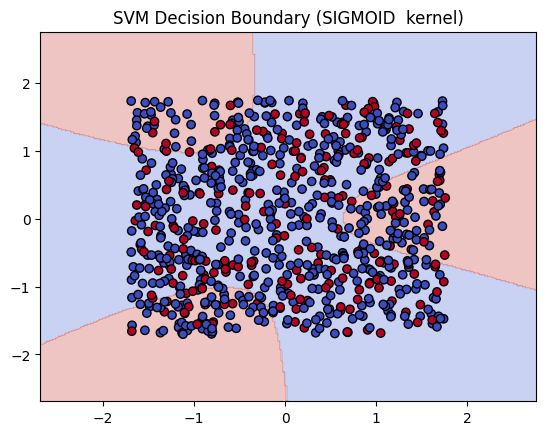

In [21]:
kernels = ['linear','poly','rbf','sigmoid']


for kernel in kernels:
    svm = SVC(kernel=kernel,degree=3,gamma='auto')
    svm.fit(X_train,y_train)

    acc = svm.score(X_test,y_test)
    print(f'kernel : {kernel}|| Accuracy: {acc*100:.2f}%')

    
    plt.Figure(figsize=(6,5))
  
    plt.title(f'SVM Decision Boundary ({kernel.upper()}  kernel)')
    x_min,x_max = X_scaled[:,0].min()-1, X_scaled[:, 0].max()+1
    y_min,y_max = X_scaled[:,0].min()-1, X_scaled[:, 0].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,300),
                         np.linspace(y_min,y_max,300))
    
    Z = svm.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.contourf(xx,yy,Z,alpha=0.3,cmap=plt.cm.coolwarm)
    plt.scatter(X_scaled[:,0],X_scaled[:,1],c=y,cmap=plt.cm.coolwarm,edgecolor='k')
    plt.show()